On extrait les jsons qui indique le nombre d'objet en mouvement et immobile d'après l'algorithme de détection et de suivi

In [1]:
from mouvement_label.preprocess import read_jsons,preprocess
from mouvement_label.detection_mouvement import detect_moving_frame,frame_by_frame
from mouvement_label.affichage import graph,graphe_capteurs,correlation_pm25
from mouvement_label.annotation import detection_mouvement,annotate,add_labels_to_df
from tqdm import tqdm
import json

In [2]:
data_json_dict,frame_json_dict=read_jsons(PATH="./json/",num_cam="cam1",date="20240328")

un exemple

In [3]:
#data_exp=detection_mouvement(data_json_dict,frame_json_dict)

In [4]:
#with open("./20240328.json","w") as f:
#    json.dump(data_exp,f)

Annotation des vidéos

In [5]:
with open("./20240328.json",'r') as f:
    data_exp = json.load(f)

In [6]:
annotation=annotate(data_exp)

In [7]:
annotation

{'20240328135129': 'aucun passage',
 '20240328135329': '2 passage(s)',
 '20240328105223': 'aucun passage',
 '20240328112839': '1 passage(s)',
 '20240328113640': 'aucun passage',
 '20240328115042': '3 passage(s)',
 '20240328115242': '1 passage(s)',
 '20240328115442': 'aucun passage',
 '20240328121925': '1 passage(s)',
 '20240328122125': '1 passage(s)',
 '20240328122525': '1 passage(s)',
 '20240328123525': '2 passage(s)',
 '20240328123725': '1 passage(s)',
 '20240328123925': '2 passage(s)',
 '20240328125128': '1 passage(s)',
 '20240328125328': '1 passage(s)',
 '20240328131528': '2 passage(s)',
 '20240328131928': '2 passage(s)',
 '20240328132328': '1 passage(s)',
 '20240328132528': 'aucun passage',
 '20240328133129': '1 passage(s)',
 '20240328133329': 'aucun passage',
 '20240328133929': '1 passage(s)'}

In [8]:
import pandas as pd

df=pd.read_csv("D:/IMT Nord Europe/2eme annee/P6/P6 - Système automatique d'annotation de données de pollution/P6_Systeme_annotation_donnees_polution/data/output_2024-03-29_10_24.csv",index_col=None)

In [9]:
df_capteur_entreprise = add_labels_to_df(annotation=annotation,df_capteurs=df)

20240328135129
Index([ 309,  310,  311,  312,  313,  634,  635,  636,  637,  638,  869,  870,
        871,  872,  873, 1110, 1111, 1112, 1113, 1114],
      dtype='int64')
20240328135329
Index([ 311,  312,  313,  314,  315,  636,  637,  638,  639,  640,  871,  872,
        873,  874,  875, 1112, 1113, 1114, 1115, 1116],
      dtype='int64')
20240328105223
Index([ 46,  47, 130, 131, 132, 133, 134, 370, 371, 455, 456, 457, 458, 459,
       690, 691, 692, 693, 694, 931, 932, 933, 934, 935],
      dtype='int64')
20240328112839
Index([ 79,  80,  81,  82,  83, 166, 167, 168, 169, 170, 401, 402, 403, 491,
       492, 493, 494, 495, 726, 727, 728, 729, 730, 967, 968, 969, 970, 971],
      dtype='int64')
20240328113640
Index([174, 175, 176, 177, 178, 499, 500, 501, 502, 503, 734, 735, 736, 737,
       738, 975, 976, 977, 978, 979],
      dtype='int64')
20240328115042
Index([188, 189, 190, 191, 192, 513, 514, 515, 516, 517, 748, 749, 750, 751,
       752, 989, 990, 991, 992, 993],
      dtype='in

d:\IMT Nord Europe\2eme annee\P6\P6 - Système automatique d'annotation de données de pollution\P6_Systeme_annotation_donnees_polution\yolov7-deepsort-tracking\mouvement_label\annotation.py:75: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df

In [10]:
df_capteur_entreprise

,Unnamed: 0,Date,parkName,sensorId,temperature,humidity,pressure,noise,noise_max,pm1,pm2_5,pm10,aucun passage,1 passage(s),2 passage(s),3 passage(s)
0,0,2024-03-28 09:56:33+01:00,FR-19997,866356067365675,22.0,39.0,9799.0,55.0,109.0,413.0,825.0,1318.0,1.0,0.0,0.0,0.0
1,2,2024-03-28 09:58:33+01:00,FR-19997,866356067365675,22.0,40.0,9799.0,54.0,116.0,413.0,825.0,1318.0,1.0,0.0,0.0,0.0
2,4,2024-03-28 10:00:33+01:00,FR-19997,866356067365675,22.0,40.0,9799.0,51.0,109.0,413.0,825.0,1318.0,1.0,0.0,0.0,0.0
3,6,2024-03-28 10:02:33+01:00,FR-19997,866356067365675,22.0,38.0,9798.0,52.0,90.0,445.0,651.0,898.0,1.0,0.0,0.0,0.0
4,8,2024-03-28 10:06:40+01:00,FR-19997,866356067365675,22.0,37.0,9800.0,52.0,101.0,514.0,514.0,1006.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,230,2024-03-28 13:52:04+01:00,FR-19997,866833046798499,16.0,40.0,9825.0,76.0,108.0,2144.0,3380.0,7934.0,1.0,0.0,0.0,0.0
556,232,2024-03-28 13:54:04+01:00,FR-19997,866833046798499,16.0,41.0,9825.0,68.0,101.0,2154.0,2840.0,7230.0,0.0,0.0,1.0,0.0
557,234,2024-03-28 13:56:04+01:00,FR-19997,866833046798499,16.0,40.0,9825.0,63.0,102.0,2154.0,2840.0,7230.0,0.0,0.0,1.0,0.0
558,236,2024-03-28 13:58:04+01:00,FR-19997,866833046798499,17.0,40.0,9825.0,64.0,110.0,2062.0,3572.0,9168.0,0.0,0.0,1.0,0.0


In [11]:
graphe_capteurs(df=df_capteur_entreprise)

In [12]:
graphe_capteurs(indicateur="1 passage(s)",df=df_capteur_entreprise)

In [13]:
graphe_capteurs(indicateur="2 passage(s)",df=df_capteur_entreprise)

In [14]:
graphe_capteurs(indicateur="3 passage(s)",df=df_capteur_entreprise)

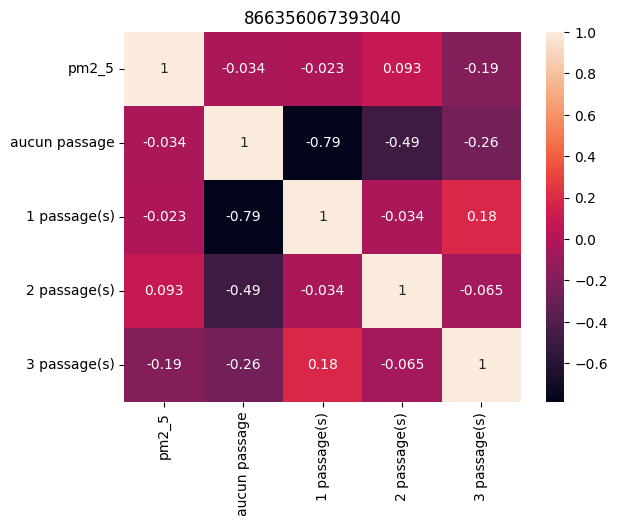

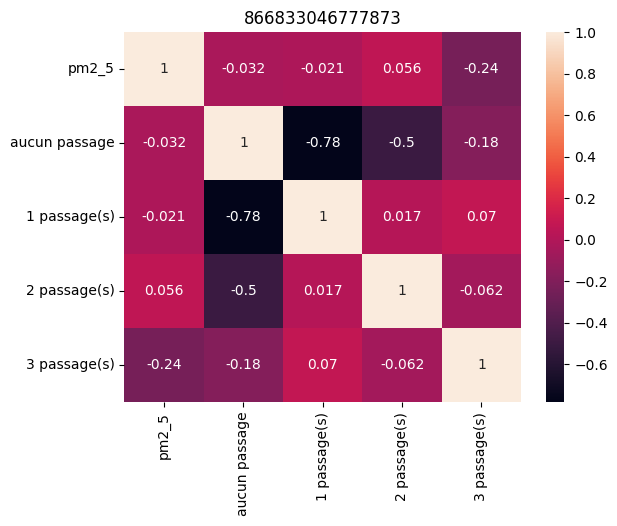

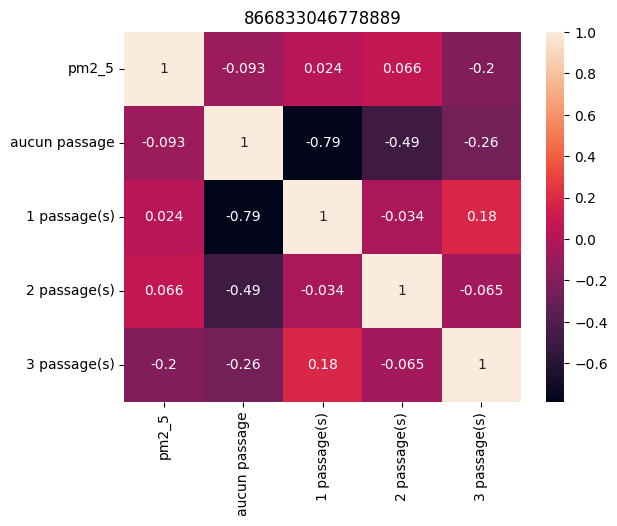

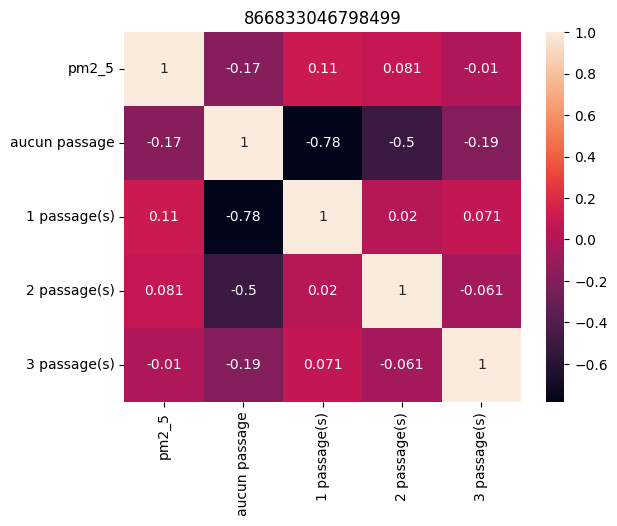

In [15]:
correlation_pm25(df_capteur_entreprise,local_maximum=False)